## Quantum Euclidean Distance

In [1]:
# import the necessary libraries 
import math as m
from qiskit import *
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

### Data preparation

In [2]:
# First step is to encode the data into quantum states. 
#There are some techniques to do it, in this case Amplitude embedding was used.

A = [2,9,8,5]
B = [7,5,10,3]

norm_A = 0
norm_B = 0
Dist = 0

for i in range(len(A)):
    norm_A += A[i]**2
    norm_B += B[i]**2
    Dist += (A[i]-B[i])**2

Dist = m.sqrt(Dist)
A_norm = m.sqrt(norm_A)
B_norm = m.sqrt(norm_B)
Z = round( A_norm**2 + B_norm**2 )
 
# create phi and psi state with the data    
phi = [A_norm/m.sqrt(Z),-B_norm/m.sqrt(Z)]
psi = []
for i in range(len(A)):
    psi.append(((A[i]/A_norm) /m.sqrt(2)))
    psi.append(((B[i]/B_norm) /m.sqrt(2)))

 ###  Quantum Circuit




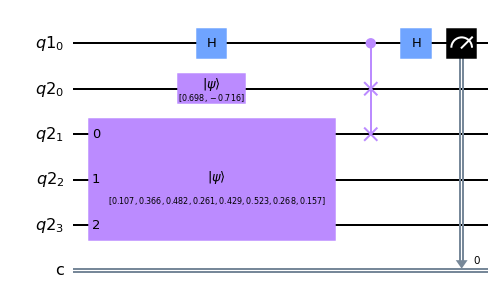

In [3]:
# Quantum Circuit
q1 = QuantumRegister(1,name='q1')
q2 = QuantumRegister(4,name='q2')
c = ClassicalRegister(1,name='c')
qc= QuantumCircuit(q1,q2,c)

# states initialization
qc.initialize( phi, q2[0] )
qc.initialize( psi, q2[1:4] )

# The swap test operator 
qc.h( q1[0] )
qc.cswap( q1[0], q2[0], q2[1] )
qc.h( q1[0] )
qc.measure(q1,c)

display(qc.draw(output="mpl"))

In [4]:
## Results
shots = 10000
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shots)
job_result = job.result()
counts = job_result.get_counts(qc)
x = abs(((counts['0']/shots - 0.5)/0.5)*2*Z)
Q_Dist = round(m.sqrt(x),4)
print('Quantum Distance: ', round(Q_Dist,3))    
print('Euclidean Distance: ',round(Dist,3))   

Quantum Distance:  7.19
Euclidean Distance:  7.0
